In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("cardio_preprocessed.csv", sep=",")
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,60,1,151,67.0,120,80,2,2,0,0,0,0,29.384676
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59307,51,1,161,56.0,170,90,1,1,0,0,1,1,21.604105
59308,53,1,172,70.0,130,90,1,1,0,0,1,1,23.661439
59309,57,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
59310,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [4]:
X = df.drop(["cardio"], axis=1)
y = df["cardio"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#this is for splitting data into train and test 80% train and 20% test and also for avoid overfitting we use random_state=42
#state=42 means that the random number generator will produce the same sequence of numbers each time you run the code.

### Scale the data

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#standarScalar is used to standardize features by removing the mean and scaling to unit variance.

## Logistic Regression

In [7]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
# logistic regression is used for binary classification problem

LogisticRegression()

### Predict Logistic Model

In [8]:
y_pred_log = log_model.predict(X_test)

### Evaluate Logistic Model

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
#confusion matrix is used to evaluate the performance of a classification algorithm
#classification report is used to evaluate the precision, recall, f1-score of the model
#precision is the ratio of correctly predicted positive observations to the total predicted positives.
#recall is the ratio of correctly predicted positive observations to all actual positives.
#f1-score is the weighted average of precision and recall.

Accuracy: 0.7226671162437832
[[4472 1346]
 [1944 4101]]
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      5818
           1       0.75      0.68      0.71      6045

    accuracy                           0.72     11863
   macro avg       0.72      0.72      0.72     11863
weighted avg       0.73      0.72      0.72     11863



In [10]:
train_pred = log_model.predict(X_train)
test_pred = log_model.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.7190035617188982
Testing Accuracy: 0.7226671162437832


### Hyper-parameter tuning using Grid Search

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'], # we can also take L1 here but l2 is giving best accuracy
    'solver': ['lbfgs', 'liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
# C → Controls how strict the model is. Smaller C = stronger regularization.
#     We test 0.01, 0.1, 1, and 10 to see which gives best accuracy.
# penalty → Type of regularization. We use L2 because it is stable and works well.
# solver → The algorithm used to train logistic regression.
#     'lbfgs' → fast and stable, good for small to medium data.
#     'liblinear' → best for binary classification problems.

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.7190878818033547


### Random Forest

In [24]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42);
rf.fit(X_train, y_train)

#n_estimators is the number of trees in the forest
#max_depth is the maximum depth of the tree
#random_state is used for reproducibility

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

### Predicting using random forest

In [25]:
y_pred_rf = rf.predict(X_test)

In [26]:
print("Random forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random forest Accuracy: 0.7301694343757903
[[4552 1266]
 [1935 4110]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      5818
           1       0.76      0.68      0.72      6045

    accuracy                           0.73     11863
   macro avg       0.73      0.73      0.73     11863
weighted avg       0.73      0.73      0.73     11863



### Visualization with confusion matrix

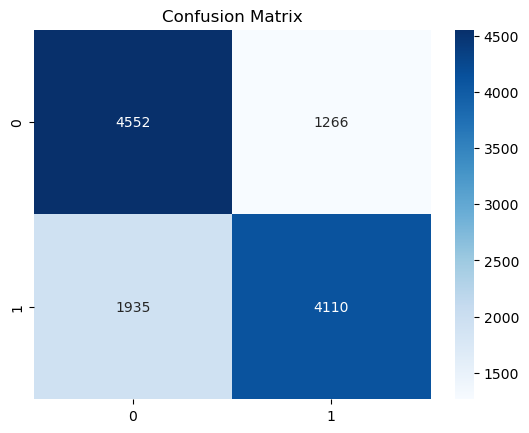

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred_rf)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

### ROC Curve

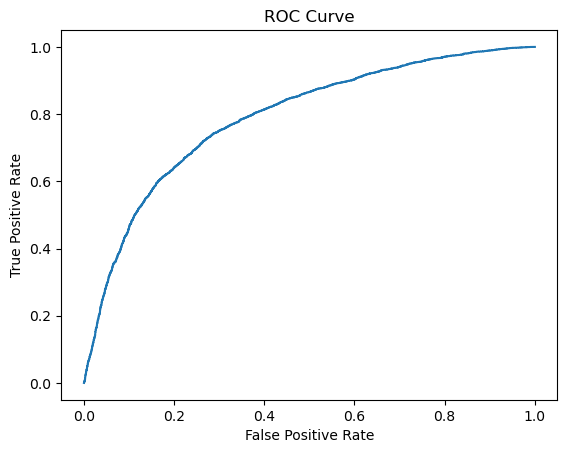

In [29]:
from sklearn.metrics import roc_curve, auc

y_prob = log_model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### K-Fold Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])
kfold = KFold(
    n_splits=5,      # 5-fold CV
    shuffle=True,
    random_state=42
)

cv_scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=kfold,
    scoring='accuracy'
)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation Accuracy:", cv_scores.mean())

Cross-validation scores: [0.72266712 0.72629183 0.71033553 0.72053617 0.7185129 ]
Mean cross-validation Accuracy: 0.719668707486967


In [33]:
import pickle
import os
#pickle is used for serializing and deserializing a Python object structure.

# Create model folder if not exists
if not os.path.exists("model"):
    os.makedirs("model")

# Save Random Forest model
pickle.dump(rf, open("model/model.pkl", "wb"))

# Save scaler used during training
pickle.dump(scaler, open("model/scaler.pkl", "wb"))

print("Random Forest model and scaler saved successfully!")

Random Forest model and scaler saved successfully!
